# Plotting of GMAP results

This notebook shows how to do a fit with the `gmapy` package and plot some results afterwards.

## Load necessary libraries

In [1]:
import numpy as np
import pandas as pd
from numpy.random import default_rng
import matplotlib.pyplot as plt
from gmapy.legacy.legacy_gmap import run_gmap
from gmapy.mappings.compound_map import CompoundMap
dbfile = '../../gmapy/tests/testdata/data-2017-07-26.gma'

2024-07-02 14:58:49.552753: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-02 14:58:49.553090: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-02 14:58:49.555224: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-02 14:58:49.580815: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-02 14:58:50.088305: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

## Perform the fit

In [2]:
%%capture
res = run_gmap(dbfile, dbtype='legacy', num_iter=3, fix_ppp_bug=True, fix_sacs_jacobian=True, legacy_output=False)

## Examine the result data

The dictionary returned by `run_gmap` contains a `table` field, which contains a dataframe with the information to be plotted. Let's have a look at this dataframe:

In [3]:
resdf = res['table']
resdf[(resdf.ENERGY > 0) & (resdf.ENERGY < 0.001) & (resdf.REAC == 'MT:1-R1:1')]

,NODE,REAC,ENERGY,PRIOR,UNC,DESCR,DATA,DB_IDX,DS_IDX,AUTHOR,PUBREF,DATAUNC,POST,POSTUNC,RELPOSTUNC
0,xsid_1,MT:1-R1:1,2.530000e-08,938.131177,inf,"6Li(n,a)",NaN,NaN,NaN,NaN,NaN,inf,938.131177,0.544431,0.000580
1,xsid_1,MT:1-R1:1,9.400000e-06,48.639696,inf,"6Li(n,a)",NaN,NaN,NaN,NaN,NaN,inf,48.639696,0.028207,0.000580
2,xsid_1,MT:1-R1:1,1.500000e-04,12.160772,inf,"6Li(n,a)",NaN,NaN,NaN,NaN,NaN,inf,12.160772,0.004038,0.000332
3,xsid_1,MT:1-R1:1,2.500000e-04,9.413054,inf,"6Li(n,a)",NaN,NaN,NaN,NaN,NaN,inf,9.413054,0.003676,0.000391
4,xsid_1,MT:1-R1:1,3.500000e-04,7.951949,inf,"6Li(n,a)",NaN,NaN,NaN,NaN,NaN,inf,7.951949,0.003027,0.000381
5,xsid_1,MT:1-R1:1,4.500000e-04,7.010730,inf,"6Li(n,a)",NaN,NaN,NaN,NaN,NaN,inf,7.010730,0.002533,0.000361
6,xsid_1,MT:1-R1:1,5.500000e-04,6.340275,inf,"6Li(n,a)",NaN,NaN,NaN,NaN,NaN,inf,6.340275,0.001921,0.000303
7,xsid_1,MT:1-R1:1,6.500000e-04,5.830441,inf,"6Li(n,a)",NaN,NaN,NaN,NaN,NaN,inf,5.830441,0.001880,0.000323
8,xsid_1,MT:1-R1:1,7.500000e-04,5.427131,inf,"6Li(n,a)",NaN,NaN,NaN,NaN,NaN,inf,5.427131,0.001486,0.000274
9,xsid_1,MT:1-R1:1,8.500000e-04,5.096999,inf,"6Li(n,a)",NaN,NaN,NaN,NaN,NaN,inf,5.096999,0.001346,0.000264


Prepare the experimental data table

In [4]:
expsel = res['table']['NODE'].str.match('exp_')
expdf = res['table'].loc[expsel].copy()
expcov = res['priorcov'][np.ix_(expsel, expsel)]
expdf['UNC'] = np.sqrt(expcov.diagonal())
expdf['RELUNC'] = expdf['UNC'] / expdf['DATA']
pd.set_option("display.max_rows", 50)
expdf[expdf['REAC'] == 'MT:1-R1:1'].sort_values(by='ENERGY')

,NODE,REAC,ENERGY,PRIOR,UNC,DESCR,DATA,DB_IDX,DS_IDX,AUTHOR,PUBREF,DATAUNC,POST,POSTUNC,RELPOSTUNC,RELUNC
8002,exp_2001,MT:1-R1:1,2.530000e-08,NaN,0.562879,NaN,938.525000,217.0,1.0,G.Hale+Chen Zhenpeng - (EDA+RAC),"/2 6Li(n,t) Aug16;unc%=sqrt((RA",0.562879,938.131177,NaN,NaN,0.000600
4649,exp_900,MT:1-R1:1,2.530000e-08,NaN,568.711802,NaN,938.131177,107.0,0.0,DUMMY,INVENT 10,568.711802,938.131177,NaN,NaN,0.606218
4650,exp_900,MT:1-R1:1,9.400000e-06,NaN,29.486248,NaN,48.639696,107.0,0.0,DUMMY,INVENT 10,29.486248,48.639696,NaN,NaN,0.606218
8003,exp_2001,MT:1-R1:1,9.400000e-06,NaN,0.029184,NaN,48.660000,217.0,1.0,G.Hale+Chen Zhenpeng - (EDA+RAC),"/2 6Li(n,t) Aug16;unc%=sqrt((RA",0.029184,48.639696,NaN,NaN,0.000600
8004,exp_2001,MT:1-R1:1,1.500000e-04,NaN,0.004135,NaN,12.163000,217.0,1.0,G.Hale+Chen Zhenpeng - (EDA+RAC),"/2 6Li(n,t) Aug16;unc%=sqrt((RA",0.004135,12.160772,NaN,NaN,0.000340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4726,exp_900,MT:1-R1:1,2.400000e+00,NaN,0.129467,NaN,0.213566,107.0,0.0,DUMMY,INVENT 10,0.129467,0.213566,NaN,NaN,0.606218
4727,exp_900,MT:1-R1:1,2.600000e+00,NaN,0.121629,NaN,0.200636,107.0,0.0,DUMMY,INVENT 10,0.121629,0.200636,NaN,NaN,0.606218
8080,exp_2001,MT:1-R1:1,2.600000e+00,NaN,0.010303,NaN,0.188200,217.0,1.0,G.Hale+Chen Zhenpeng - (EDA+RAC),"/2 6Li(n,t) Aug16;unc%=sqrt((RA",0.010303,0.200636,NaN,NaN,0.054743
8081,exp_2001,MT:1-R1:1,2.800000e+00,NaN,0.008755,NaN,0.169300,217.0,1.0,G.Hale+Chen Zhenpeng - (EDA+RAC),"/2 6Li(n,t) Aug16;unc%=sqrt((RA",0.008755,0.184309,NaN,NaN,0.051711


We remove the dummy datapoints which only act as a regularizer and have huge uncertainties---not useful for plotting

In [5]:
expdf = expdf.loc[~(expdf['NODE'].str.match('exp_90'))].copy()
expdf[(expdf.REAC == 'MT:1-R1:1') & (expdf.ENERGY > 0.) & (expdf.ENERGY < 0.001)]

,NODE,REAC,ENERGY,PRIOR,UNC,DESCR,DATA,DB_IDX,DS_IDX,AUTHOR,PUBREF,DATAUNC,POST,POSTUNC,RELPOSTUNC,RELUNC
8002,exp_2001,MT:1-R1:1,2.530000e-08,NaN,0.562879,NaN,938.5250,217.0,1.0,G.Hale+Chen Zhenpeng - (EDA+RAC),"/2 6Li(n,t) Aug16;unc%=sqrt((RA",0.562879,938.131177,NaN,NaN,0.00060
8003,exp_2001,MT:1-R1:1,9.400000e-06,NaN,0.029184,NaN,48.6600,217.0,1.0,G.Hale+Chen Zhenpeng - (EDA+RAC),"/2 6Li(n,t) Aug16;unc%=sqrt((RA",0.029184,48.639696,NaN,NaN,0.00060
8004,exp_2001,MT:1-R1:1,1.500000e-04,NaN,0.004135,NaN,12.1630,217.0,1.0,G.Hale+Chen Zhenpeng - (EDA+RAC),"/2 6Li(n,t) Aug16;unc%=sqrt((RA",0.004135,12.160772,NaN,NaN,0.00034
8005,exp_2001,MT:1-R1:1,2.500000e-04,NaN,0.003765,NaN,9.4150,217.0,1.0,G.Hale+Chen Zhenpeng - (EDA+RAC),"/2 6Li(n,t) Aug16;unc%=sqrt((RA",0.003765,9.413054,NaN,NaN,0.00040
8006,exp_2001,MT:1-R1:1,3.500000e-04,NaN,0.003101,NaN,7.9535,217.0,1.0,G.Hale+Chen Zhenpeng - (EDA+RAC),"/2 6Li(n,t) Aug16;unc%=sqrt((RA",0.003101,7.951949,NaN,NaN,0.00039
8007,exp_2001,MT:1-R1:1,4.500000e-04,NaN,0.002594,NaN,7.0120,217.0,1.0,G.Hale+Chen Zhenpeng - (EDA+RAC),"/2 6Li(n,t) Aug16;unc%=sqrt((RA",0.002594,7.010730,NaN,NaN,0.00037
8008,exp_2001,MT:1-R1:1,5.500000e-04,NaN,0.001965,NaN,6.3412,217.0,1.0,G.Hale+Chen Zhenpeng - (EDA+RAC),"/2 6Li(n,t) Aug16;unc%=sqrt((RA",0.001965,6.340275,NaN,NaN,0.00031
8009,exp_2001,MT:1-R1:1,6.500000e-04,NaN,0.001924,NaN,5.8313,217.0,1.0,G.Hale+Chen Zhenpeng - (EDA+RAC),"/2 6Li(n,t) Aug16;unc%=sqrt((RA",0.001924,5.830441,NaN,NaN,0.00033
8010,exp_2001,MT:1-R1:1,7.500000e-04,NaN,0.001520,NaN,5.4278,217.0,1.0,G.Hale+Chen Zhenpeng - (EDA+RAC),"/2 6Li(n,t) Aug16;unc%=sqrt((RA",0.001520,5.427131,NaN,NaN,0.00028
8011,exp_2001,MT:1-R1:1,8.500000e-04,NaN,0.001376,NaN,5.0976,217.0,1.0,G.Hale+Chen Zhenpeng - (EDA+RAC),"/2 6Li(n,t) Aug16;unc%=sqrt((RA",0.001376,5.096999,NaN,NaN,0.00027


## Plot the result data

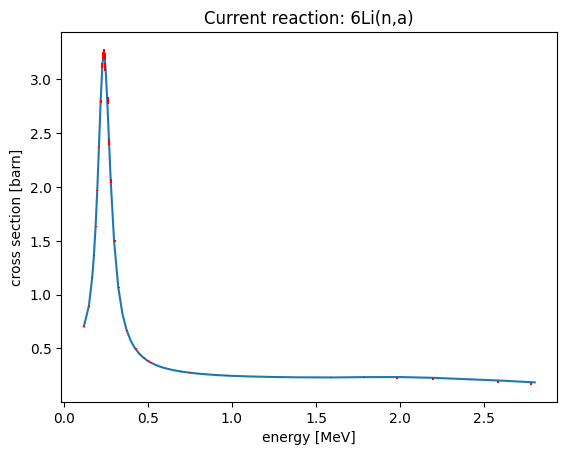

In [7]:
%matplotlib inline
# plot the evaluated curve
curdf = expdf[np.logical_and(expdf['REAC'] == 'MT:1-R1:1', expdf['ENERGY'] > 0.1)]
xvals = curdf['ENERGY']
yvals = curdf['POST']
uncs = curdf['POSTUNC']
plt.title(f'Current reaction: {resdf["DESCR"].iloc[0]}')
plt.xlabel('energy [MeV]')
plt.ylabel('cross section [barn]')
plt.plot(xvals, yvals)
# NOTE: run_gmapy does no longer provide posterior values in POSTUNC column.
#       Use GMADatabase class if you want to calculate posterior uncertainties
#       or covariance matrix.
# plt.errorbar(tuple(xvals), tuple(yvals), yerr=tuple(uncs))

# add the experimental data
curexpdf = expdf[(expdf['REAC'] == 'MT:1-R1:1') & (expdf['ENERGY'] > 0.1)]
exp_x = curexpdf['ENERGY'].to_numpy()
rng = default_rng()
exp_x = [rng.uniform(x*0.99, x*1.01, 1) for x in exp_x]
exp_y = curexpdf['DATA']
exp_unc = curexpdf['UNC']
plt.errorbar(exp_x, exp_y, yerr=exp_unc, fmt='none', ecolor='red')
plt.show()